In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
# Load the data without headers, assuming the file has no headers
file_path = "C:/Lenovo Laptop Data/user data/Downloads/DAAD DDP/Experimental Data/AAV LV2 Data.csv"
data = pd.read_csv(file_path, header=None)

In [38]:
# Load the data without headers, assuming the file has no headers
file_path = "C:/Lenovo Laptop Data/user data/Downloads/DAAD DDP/Experimental Data/AAV LV2 GP Data.csv"
data = pd.read_csv(file_path, header=None)

          0       1       2       3       4       5       6       7       8   \
0       0.00  42.331  42.541  43.408  43.606  37.776  35.676  38.745  40.851   
1      30.00  40.886  40.871  46.929  40.739  35.857  34.249  37.037  39.759   
2      60.00  43.425  42.476  41.947  41.486  36.388  32.696  37.039  38.825   
3      90.00  39.204  40.708  41.404  38.431  34.875  31.975  34.871  38.855   
4     120.00  39.337  39.967  37.637  37.831  33.365  30.975  34.237  34.976   
..       ...     ...     ...     ...     ...     ...     ...     ...     ...   
230  6900.25  33.255  36.290  42.408  39.947  36.008  33.749  46.878  51.151   
231  6930.25  34.418  37.300  41.929  38.676  35.457  34.486  48.792  51.551   
232  6960.25  32.692  36.890  43.076  39.186  35.682  33.427  48.927  49.753   
233  6990.25  33.478  37.175  42.861  40.237  36.255  33.547  48.724  50.629   
234  7020.25  32.216  36.782  41.767  39.239  35.778  34.137  46.465  50.686   

         9   ...      15      16      1

C:\Users\Anand\AppData\Local\Temp\ipykernel_17384\3976758559.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      42.331
1      40.886
2      43.425
3      39.204
4      39.337
        ...  
230    33.255
231    34.418
232    32.692
233    33.478
234    32.216
Name: 1, Length: 235, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.iloc[:, 1:25] = (data.iloc[:, 1:25]) / 1000
C:\Users\Anand\AppData\Local\Temp\ipykernel_17384\3976758559.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      42.541
1      40.871
2      42.476
3      40.708
4      39.967
        ...  
230    36.290
231    37.300
232    36.890
233    37.175
234    36.782
Name: 2, Length: 235, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.iloc[:, 1:25

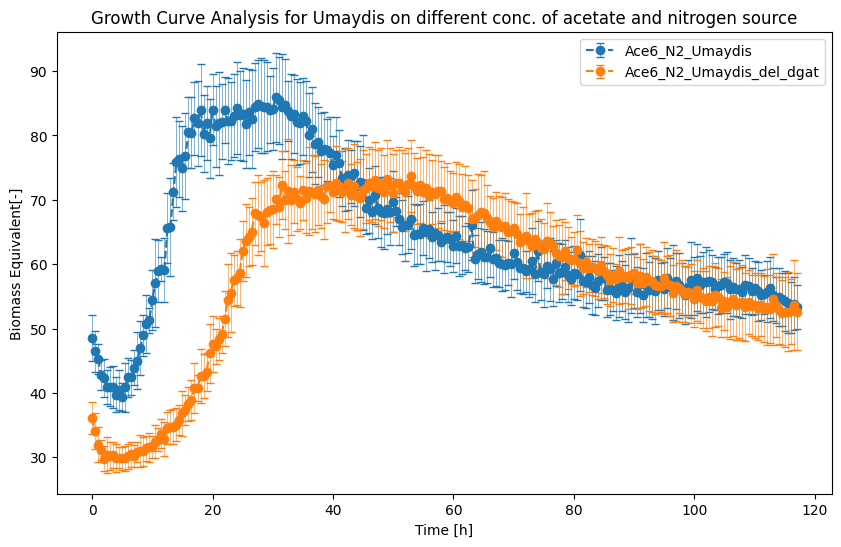

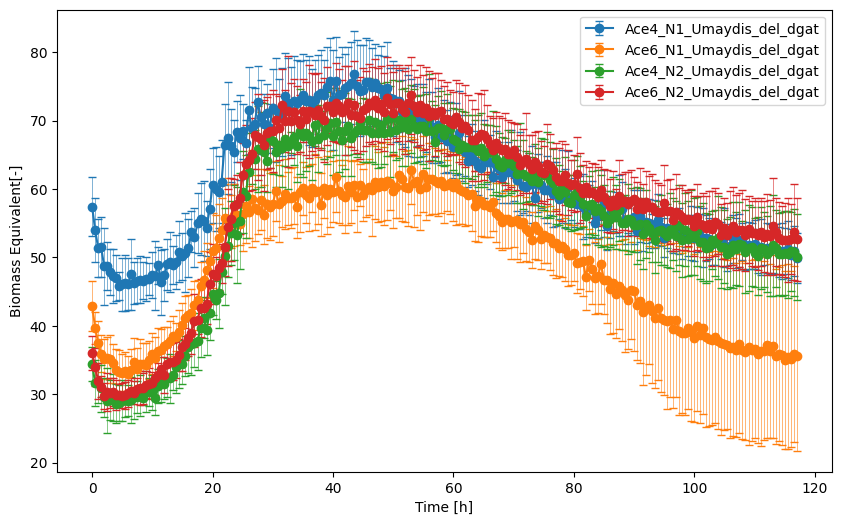

In [39]:
# Convert time from minutes to hours (assuming Column A is time)
time = data.iloc[:, 0]

# Round off values if they are not integers
time = time.apply(lambda x: round(x) if not isinstance(x, int) else x)

# Convert the time column from minutes to hours
time = time/ 60

# Divide data by 1000
data.iloc[:, 1:25] = (data.iloc[:, 1:25]) / 1000
print (data)
# Custom labels for each set of three columns
labels = [
    "Ace4_N1_Umaydis", "Ace6_N1_Umaydis", "Ace4_N2_Umaydis", "Ace6_N2_Umaydis",
    "Ace4_N1_Umaydis_del_dgat", "Ace6_N1_Umaydis_del_dgat", "Ace4_N2_Umaydis_del_dgat", "Ace6_N2_Umaydis_del_dgat"
]

# Specify which curves to plot (you can modify this list)
selected_labels = ["Ace6_N2_Umaydis_del_dgat","Ace6_N2_Umaydis"]  # Example of selected labels
selected_labels_2 = ["Ace4_N1_Umaydis_del_dgat", "Ace6_N1_Umaydis_del_dgat", "Ace4_N2_Umaydis_del_dgat", "Ace6_N2_Umaydis_del_dgat"]  # Example of selected labels
# Prepare lists to store average and std deviation for each set of three columns
averages = []
std_devs = []

# Iterate through columns in sets of three and calculate mean & std for each set
for i in range(1, 25, 3):  # Columns B to Y are index 1 to 24
    triplet = data.iloc[:, i:i+3]
    averages.append(triplet.mean(axis=1))
    std_devs.append(triplet.std(axis=1))

# Plotting 7078
plt.figure(figsize=(10, 6))

# Loop through each set, plotting only if its label is in selected_labels
for idx, (avg, std) in enumerate(zip(averages, std_devs)):
    if labels[idx] in selected_labels:
        plt.errorbar(time, avg, yerr=std, label=labels[idx], elinewidth=0.4, capsize=3, marker='o', linestyle='--')

# Customize plot
plt.xlabel('Time [h]')
plt.ylabel('Biomass Equivalent[-]')
plt.title('Growth Curve Analysis for Umaydis on different conc. of acetate and nitrogen source')
plt.legend()
plt.show()

#Plotting Umaydis_del_dgat strain
plt.figure(figsize=(10, 6))
for idx, (avg, std) in enumerate(zip(averages, std_devs)):
    if labels[idx] in selected_labels_2:
        plt.errorbar(time, avg, yerr=std, label=labels[idx], elinewidth=0.4, capsize=3, marker='o', linestyle='-')
        
# Customize plot
plt.xlabel('Time [h]')
plt.ylabel('Biomass Equivalent[-]')
#plt.title('Growth Curve Analysis Umaydis_del_dgat')
plt.legend()
plt.show()


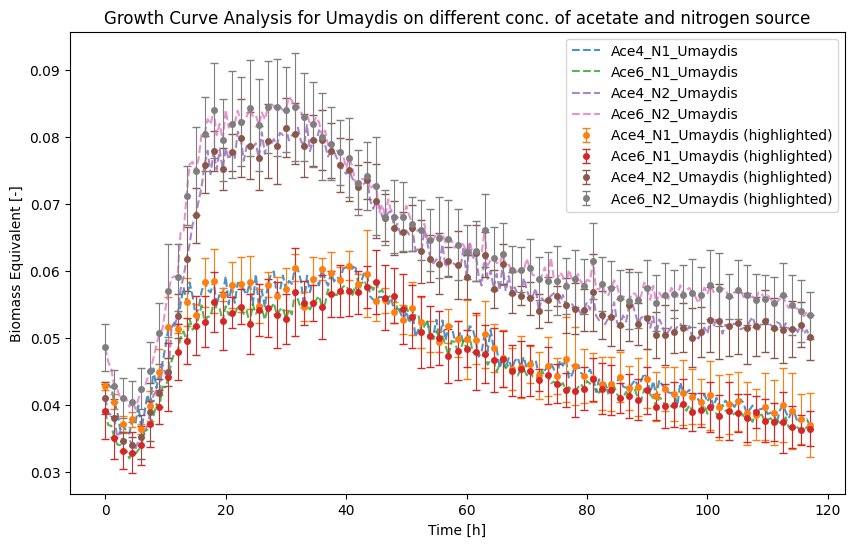

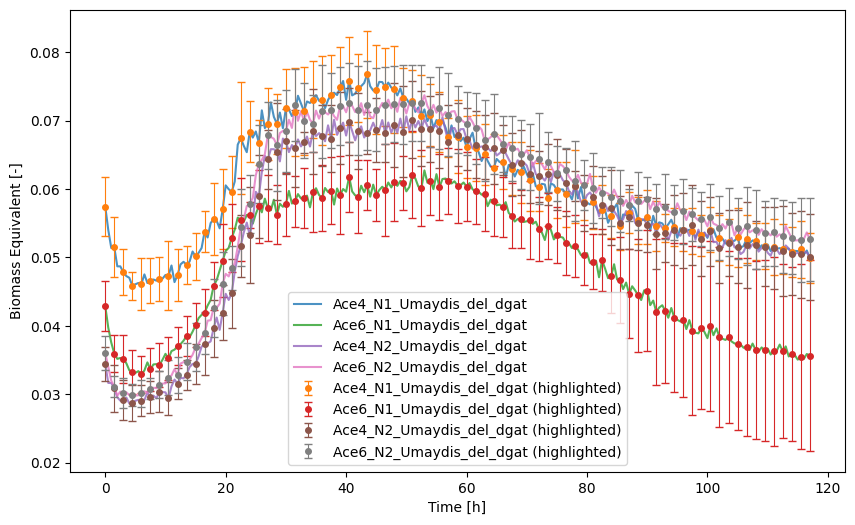

In [13]:
import matplotlib.pyplot as plt

# Function to plot smooth curves and highlight 1/3rd of points
def plot_smooth_highlighted_curve(time, avg, std, label, linestyle):
    # 1. Plot smooth curve without markers
    plt.plot(time, avg, linestyle=linestyle, alpha=0.8, linewidth=1.5, label=label)

    # 2. Overlay only 1/3rd of the points with markers and error bars
    idx = range(0, len(time), 3)  # Select every 3rd index
    plt.errorbar(time[idx], avg[idx], yerr=std[idx], 
                 fmt='o', capsize=3, elinewidth=0.8, markersize=4, label=f"{label} (highlighted)")

# Plotting 7078 strain
plt.figure(figsize=(10, 6))
for idx, (avg, std) in enumerate(zip(averages, std_devs)):
    if labels[idx] in selected_labels:
        plot_smooth_highlighted_curve(time, avg, std, labels[idx], linestyle='--')

# Customize plot
plt.xlabel('Time [h]')
plt.ylabel('Biomass Equivalent [-]')
plt.title('Growth Curve Analysis for Umaydis on different conc. of acetate and nitrogen source')
plt.legend()
plt.show()

# Plotting Umaydis_del_dgat strain
plt.figure(figsize=(10, 6))
for idx, (avg, std) in enumerate(zip(averages, std_devs)):
    if labels[idx] in selected_labels_2:
        plot_smooth_highlighted_curve(time, avg, std, labels[idx], linestyle='-')

# Customize plot
plt.xlabel('Time [h]')
plt.ylabel('Biomass Equivalent [-]')
plt.legend()
plt.show()


In [ ]:
# Load the data without headers, assuming the file has no headers
file_path = "C:/Lenovo Laptop Data/user data/Downloads/DAAD DDP/Experimental Data/MIC KO GP Data.csv"
data = pd.read_csv(file_path, header=None)
import pandas as pd
print(data.dtypes)
print(data.iloc[:, 0].head(10))  # preview first 10 values of the column you're using


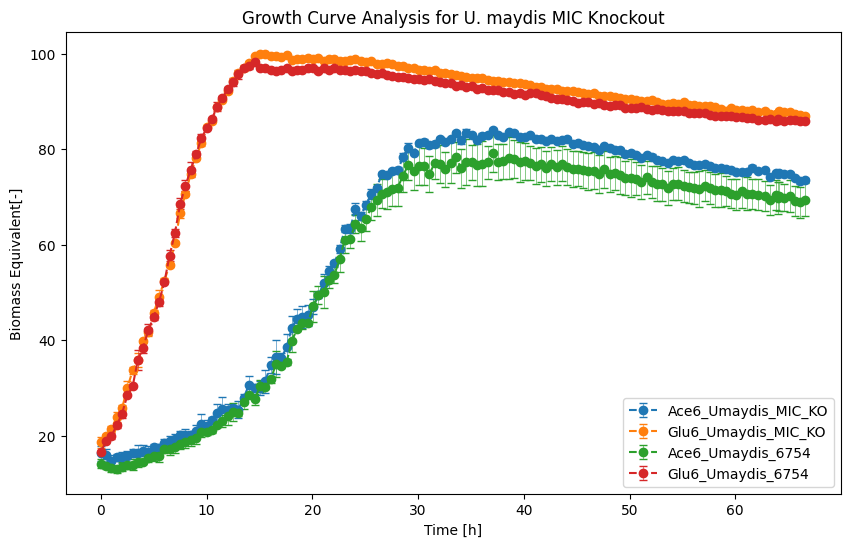

C:\Users\Anand\AppData\Local\Temp\ipykernel_16564\124903072.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


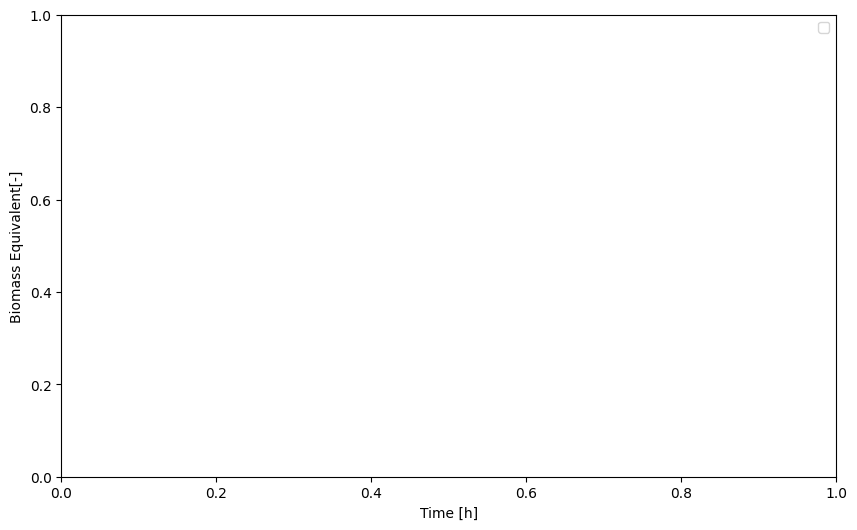

In [24]:
# Load the data without headers, assuming the file has no headers
file_path = "C:/Lenovo Laptop Data/user data/Downloads/DAAD DDP/Experimental Data/MIC KO GP Data.csv"
data = pd.read_csv(file_path, header=None)
data.iloc[:, 0] = data.iloc[:, 0].astype(str).str.replace(',', '.')
data.iloc[:, 0] = pd.to_numeric(data.iloc[:, 0], errors='coerce')
time = data.iloc[:, 0] / 60  # Convert seconds to minutes

# Step 2: Clean other columns (commas as thousand separators)
for col in data.columns[1:]:
    data[col] = data[col].astype(str).str.replace(',', '.')
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Custom labels for each set of three columns
labels = [
     "Ace6_Umaydis_MIC_KO", "Glu6_Umaydis_MIC_KO", "Ace6_Umaydis_6754", "Glu6_Umaydis_6754"
]

averages = []
std_devs = []

# Iterate through columns in sets of three and calculate mean & std for each set
for i in range(1, 13, 3):  # Columns B to Y are index 1 to 24
    triplet = data.iloc[:, i:i+3]
    averages.append(triplet.mean(axis=1))
    std_devs.append(triplet.std(axis=1))

# Plotting 7078
plt.figure(figsize=(10, 6))

# Loop through each set, plotting only if its label is in selected_labels
for idx, (avg, std) in enumerate(zip(averages, std_devs)):
    if labels[idx] in labels:
        plt.errorbar(time, avg, yerr=std, label=labels[idx], elinewidth=0.4, capsize=3, marker='o', linestyle='--')

# Customize plot
plt.xlabel('Time [h]')
plt.ylabel('Biomass Equivalent[-]')
plt.title('Growth Curve Analysis for U. maydis MIC Knockout')
plt.legend()
plt.show()

#Plotting Umaydis_del_dgat strain
plt.figure(figsize=(10, 6))
for idx, (avg, std) in enumerate(zip(averages, std_devs)):
    if labels[idx] in selected_labels_2:
        plt.errorbar(time, avg, yerr=std, label=labels[idx], elinewidth=0.4, capsize=3, marker='o', linestyle='-')
        
# Customize plot
plt.xlabel('Time [h]')
plt.ylabel('Biomass Equivalent[-]')
#plt.title('Growth Curve Analysis Umaydis_del_dgat')
plt.legend()
plt.show()


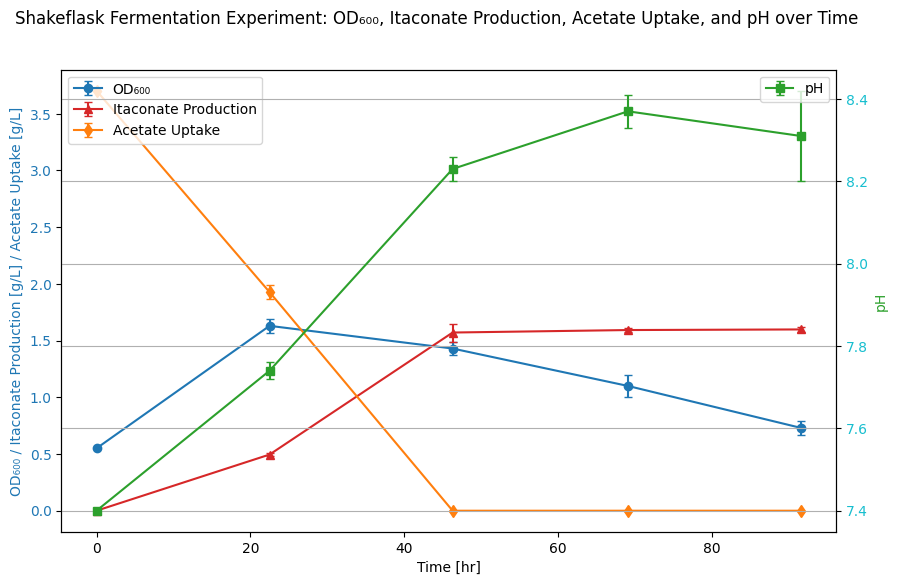

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv("C:/Lenovo Laptop Data/user data/Downloads/DAAD DDP/Computational/AAV_HPLC_Data2.csv")  

# Convert columns to numeric
numeric_cols = ["Time", "OD_M", "OD_SD", "pH_M", "pH_SD", "Itaconate_M", "Itaconate_SD", "Acetate_M", "Acetate_SD"]
data[numeric_cols] = data[numeric_cols].apply(pd.to_numeric, errors="coerce")

# Extract relevant data
time = data["Time"].values
od600 = data["OD_M"].values
od600_sd = data["OD_SD"].values
pH = data["pH_M"].values
pH_sd = data["pH_SD"].values
itaconate = data["Itaconate_M"].values
itaconate_sd = data["Itaconate_SD"].values
acetate = data["Acetate_M"].values
acetate_sd = data["Acetate_SD"].values

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# First axis (OD600, Itaconate, Acetate)
ax1.set_xlabel("Time [hr]")
ax1.set_ylabel("OD₆₀₀ / Itaconate Production [g/L] / Acetate Uptake [g/L]", color="tab:blue")
ax1.errorbar(time, od600, yerr=od600_sd, marker='o', linestyle='-', label="OD₆₀₀", capsize=3, color="tab:blue")
ax1.errorbar(time, itaconate, yerr=itaconate_sd, marker='^', linestyle='-', label="Itaconate Production", capsize=3, color="tab:red")
ax1.errorbar(time, acetate, yerr=acetate_sd, marker='d', linestyle='-', label="Acetate Uptake", capsize=3, color="tab:orange")
ax1.tick_params(axis='y', labelcolor="tab:blue")

# Second axis for pH
ax2 = ax1.twinx()
ax2.set_ylabel("pH", color="tab:green")
ax2.errorbar(time, pH, yerr=pH_sd, marker='s', linestyle='-', label="pH", capsize=3, color="tab:green")
ax2.tick_params(axis='y', labelcolor="tab:cyan")

# Titles and Legends
fig.suptitle("Shakeflask Fermentation Experiment: OD₆₀₀, Itaconate Production, Acetate Uptake, and pH over Time")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.grid(True)
plt.show()


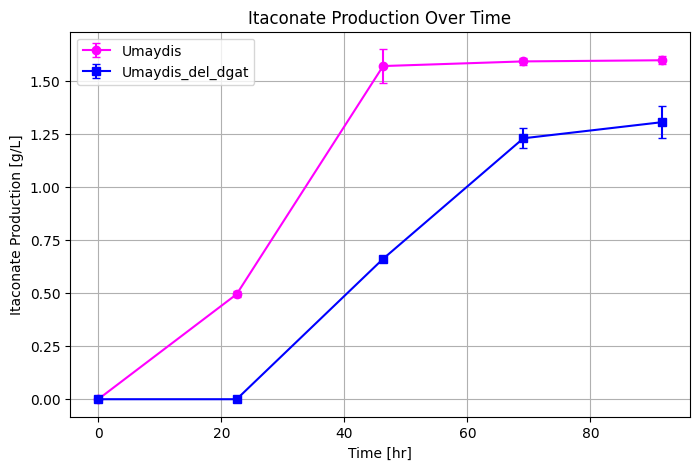

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv("C:/Lenovo Laptop Data/user data/Downloads/DAAD DDP/Computational/AAV_HPLC_Data4.csv")  

# Convert columns to numeric
numeric_cols = ["Time", "Itaconate_M", "Itaconate_SD", "Itaconate_M_2", "Itaconate_SD_2"]
data[numeric_cols] = data[numeric_cols].apply(pd.to_numeric, errors="coerce")

# Extract relevant data
time = data["Time"].values
itaconate_1 = data["Itaconate_M"].values
itaconate_sd_1 = data["Itaconate_SD"].values
itaconate_2 = data["Itaconate_M_2"].values
itaconate_sd_2 = data["Itaconate_SD_2"].values

# Create figure
plt.figure(figsize=(8, 5))

# Plot Itaconate Production for two strains
plt.errorbar(time, itaconate_1, yerr=itaconate_sd_1, marker='o', linestyle='-', label="Umaydis", capsize=3, color="magenta")
plt.errorbar(time, itaconate_2, yerr=itaconate_sd_2, marker='s', linestyle='-', label="Umaydis_del_dgat", capsize=3, color="blue")

# Formatting
plt.xlabel("Time [hr]")
plt.ylabel("Itaconate Production [g/L]")
plt.title("Itaconate Production Over Time")
plt.legend()
plt.grid(True)
plt.show()


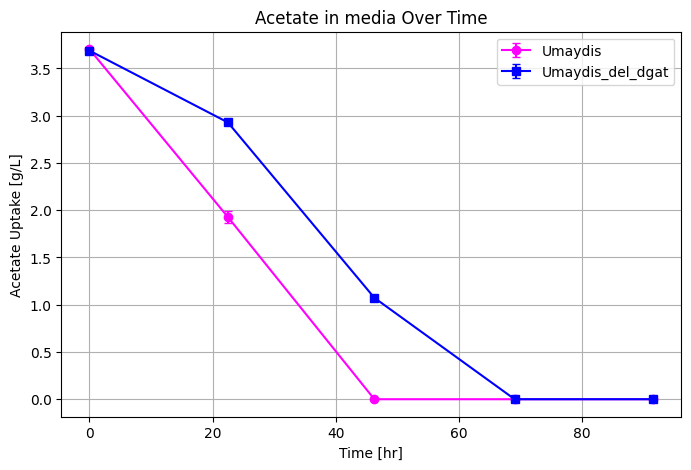

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv("C:/Lenovo Laptop Data/user data/Downloads/DAAD DDP/Computational/AAV_HPLC_7078.csv")  
data_2 = pd.read_csv("C:/Lenovo Laptop Data/user data/Downloads/DAAD DDP/Computational/AAV_HPLC_4856.csv") 

# Convert columns to numeric
numeric_cols = ["Time", "OD_M", "OD_SD", "pH_M", "pH_SD", "Itaconate_M", "Itaconate_SD", "Acetate_M", "Acetate_SD"]
data[numeric_cols] = data[numeric_cols].apply(pd.to_numeric, errors="coerce")
data_2[numeric_cols] = data_2[numeric_cols].apply(pd.to_numeric, errors="coerce")

# Extract relevant data
time = data["Time"].values
OD_1 = data["Acetate_M"].values
OD_sd_1 = data["Acetate_SD"].values
OD_2 = data_2["Acetate_M"].values
OD_sd_2 = data_2["Acetate_SD"].values

# Create figure
plt.figure(figsize=(8, 5))

# Plot OD Production for two strains
plt.errorbar(time, OD_1, yerr=OD_sd_1, marker='o', linestyle='-', label="Umaydis", capsize=3, color="magenta")
plt.errorbar(time, OD_2, yerr=OD_sd_2, marker='s', linestyle='-', label="Umaydis_del_dgat", capsize=3, color="blue")

# Formatting
plt.xlabel("Time [hr]")
plt.ylabel("Acetate Uptake [g/L]")
plt.title("Acetate in media Over Time")
plt.legend()
plt.grid(True)
plt.show()


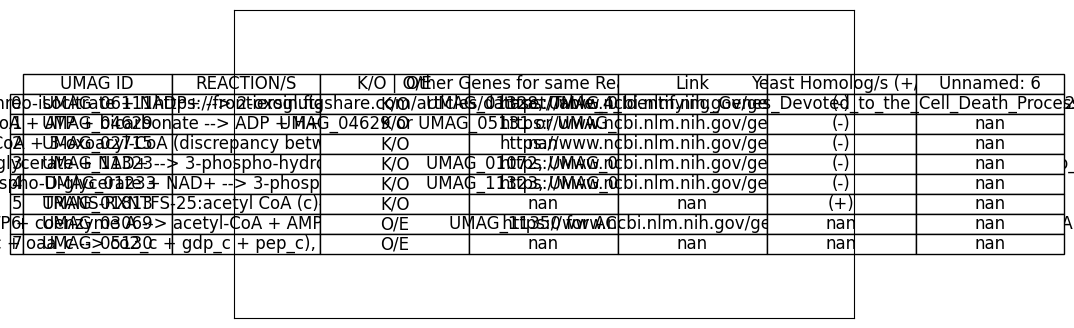

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table

# Read the CSV file
df = pd.read_csv("C:/Lenovo Laptop Data/user data/Downloads/DAAD DDP/Computational/Knockouts_for_Experiments.csv") 

# Create a plot for the table
fig, ax = plt.subplots(figsize=(8, 4))  # You can adjust the size here

# Hide axes
ax.xaxis.set_visible(False)  # Hide x-axis
ax.yaxis.set_visible(False)  # Hide y-axis

# Create the table on the plot
tbl = table(ax, df, loc='center', cellLoc='center', colWidths=[0.2]*len(df.columns))

# Customize table appearance
tbl.auto_set_font_size(False)
tbl.set_fontsize(12)
tbl.scale(1.2, 1.2)  # Scale the table size

# Save the table as an image
plt.savefig('table_image.png', bbox_inches='tight', dpi=300)
plt.show()
